# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [125]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns

# Create two new dataframes
north_df = pd.read_csv('C:/Users/Subhashini/SubhaGitJuputer/call-center-cleanup-assignment/NorthCallCenter.csv')
south_df = pd.read_csv('C:/Users/Subhashini/SubhaGitJuputer/call-center-cleanup-assignment/SouthCallCenter.csv')

In [126]:
north_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [127]:
south_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [128]:
#Code Used:
north_reps = len(north_df['Rep ID'].unique())
print("The number of reps in the North branch is:", north_reps)

The number of reps in the North branch is: 9


#### EDA Question 1B:  How many reps are in the South branch?  

In [129]:
#Code Used:
south_reps = len(south_df['Rep ID'].unique())
print("The number of reps in the South branch is:", south_reps)

The number of reps in the South branch is: 11


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [130]:
#Code Used:
northdata = north_df[north_df['Branch'] == 'North']

busyMinutes = northdata['Busy Minutes'].mean()
notReadyMinutes = northdata['Not Ready Minutes'].mean()
Incomingwaittime = northdata['Incoming Wait Time'].mean()
duringCallWaiTime = northdata['During Call Wait Time'].mean()

print("Avg Busy Minutes:",busyMinutes)
print("Avg Not Ready Minutes:",notReadyMinutes)
print("Avg Incoming Wait Time:",Incomingwaittime)
print("Avg During Call Wait Time:,",duringCallWaiTime)

Avg Busy Minutes: 9.987755102040817
Avg Not Ready Minutes: 1.9142857142857144
Avg Incoming Wait Time: 3.048780487804878
Avg During Call Wait Time:, 2.9673469387755103


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [131]:
#Code Used:
southData = south_df[south_df['Branch'] == 'South']

#Calculate averages
avg_busy_minutes = southData['Busy Minutes'].mean()
avg_not_ready_minutes = southData['Not Ready Minutes'].mean()
avg_incoming_wait_time = southData['Incoming Wait Time'].mean()
avg_during_call_wait_time = southData['During Call Wait Time'].mean()

print("Average Busy Minutes:", avg_busy_minutes)
print("Average Not Ready Minutes:",avg_not_ready_minutes)
print("Average  Incoming Wait Time:",avg_incoming_wait_time)
print("Average During Call Wait Time:,", avg_during_call_wait_time)

Average Busy Minutes: 10.054140127388536
Average Not Ready Minutes: 1.910828025477707
Average  Incoming Wait Time: 3.0
Average During Call Wait Time:, 3.0764331210191083


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [132]:
# Code Used:
combined_df = pd.concat([north_df, south_df])

perBlock = combined_df.groupby('Time Block')['Calls'].sum()

print(perBlock)


Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Calls, dtype: int64


##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = The number of reps in the North branch is: 9
- 1b) Reps in the South Branch = The number of reps in the South branch is: 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = Average Busy Minutes: 9.99
> - Not Ready Minutes = Average Not Ready Minutes: 1.91
> - Incoming Wait Time = Average  Incoming Wait Time: 3.05
> - During Call Wait Time = Average During Call Wait Time:, 2.97

- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = Average Busy Minutes: 10.05
> - Average During Call Wait Time:, 3.08
> - Not Ready Minutes = Average Not Ready Minutes: 1.91
> - Incoming Wait Time = Average  Incoming Wait Time: 3.0
> - During Call Wait Time = Average Not Ready Minutes: 1.91

- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

In [133]:
north_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [134]:
south_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


In [135]:
north_df.describe()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,245.000000,245.000000,245.000000,245.000000,245.000000,82.000000,245.000000,245.0
mean,122.000000,0.020408,0.028571,9.987755,1.914286,3.048780,2.967347,1.0
std,70.869599,0.141681,0.166940,1.403980,0.771416,1.456382,0.843827,0.0
min,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,2.000000,1.0
25%,61.000000,0.000000,0.000000,9.000000,1.000000,2.000000,2.000000,1.0
50%,122.000000,0.000000,0.000000,10.000000,2.000000,3.000000,3.000000,1.0
75%,183.000000,0.000000,0.000000,11.000000,3.000000,4.000000,4.000000,1.0
max,244.000000,1.000000,1.000000,12.000000,3.000000,5.000000,4.000000,1.0


In [136]:
south_df.describe()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,314.000000,314.000000,314.000000,314.00000,314.000000,126.000000,314.000000,314.0
mean,156.500000,0.035032,0.012739,10.05414,1.910828,3.000000,3.076433,1.0
std,90.788215,0.184154,0.112324,1.40751,0.860016,1.308434,0.819424,0.0
min,0.000000,0.000000,0.000000,8.00000,1.000000,1.000000,2.000000,1.0
25%,78.250000,0.000000,0.000000,9.00000,1.000000,2.000000,2.000000,1.0
50%,156.500000,0.000000,0.000000,10.00000,2.000000,3.000000,3.000000,1.0
75%,234.750000,0.000000,0.000000,11.00000,3.000000,4.000000,4.000000,1.0
max,313.000000,1.000000,1.000000,12.00000,3.000000,5.000000,4.000000,1.0


In [137]:
north_df.duplicated().sum()

0

In [138]:
south_df.duplicated().sum()

0

In [139]:
north_df.isnull().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64

In [140]:
south_df.isnull().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64

In [141]:
north_df.dtypes

Unnamed: 0                 int64
Branch                    object
Call Purpose              object
Time Block                object
Incoming or Outgoing      object
Queue                     object
Rep ID                    object
Sale                      object
Lost Call                  int64
Abandoned                  int64
Busy Minutes               int64
Not Ready Minutes          int64
Incoming Wait Time       float64
During Call Wait Time      int64
Calls                      int64
dtype: object

In [142]:
south_df.dtypes

Unnamed: 0                 int64
Branch                    object
Call Purpose              object
Time Block                object
Incoming or Outgoing      object
Queue                     object
Rep ID                    object
Sale                      object
Lost Call                  int64
Abandoned                  int64
Busy Minutes               int64
Not Ready Minutes          int64
Incoming Wait Time       float64
During Call Wait Time      int64
Calls                      int64
dtype: object

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: Based on the initial exploration of the data, there only one missing data is "Incoming Wait Time " in either the North or South call center datasets.

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: Check for any data entry error , manually correct the data by using ".loc" pandas accessor

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: Based on the initial exploration of the data, there doesn't appear to be any duplicate data in either the North or South call center datasets. If duplicates were found, I would consider the context of the data to determine the appropriate action. If the duplicates were a result of a data entry error, I would remove the duplicate rows using the drop_duplicates() function:

In [143]:
#Code Used
# Add Additional Cells as needed.

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: All the data is required for the analyis. Nulls,NaN values ,duplicate rows can be deleted using drop ,drop_duplicates and fillna.

In [144]:
#Code Used
# Add Additional Cells as needed.

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [145]:
# Create dataframe for the entire company named df
# Combining the two datasets 
df = pd.concat([north_df,south_df])

df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = The representative with the highest number of calls is Brent with a total of 37 calls.
- South Branch = The representative with the highest number of calls is Eric with a total of 35 calls.


In [146]:
# Code Used
# Group by Rep ID and sum 
repid_sum = df.groupby(['Branch', 'Rep ID']).agg({
     'Calls': 'sum'
})

# Sort by Calls 

repid_sum = repid_sum.sort_values(by= 'Calls', ascending=False)
repid_sum

Calls
Branch Rep ID       
North  Brent      37
South  Eric       35
       Randy      33
       Sandy      32
       Helga      31
North  Lilly      30
       Duke       29
       Todd       29
South  Kate       29
       George     29
       Karl       28
       Josh       26
       Susan      26
North  Joe        26
South  Sharon     25
North  Xander     24
       Cam        24
       Andy       23
       Amanda     23
South  Alice      20

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.85%
- South Branch = 1.27%
- Company Wide = 1.96%
- Do any of these fall out of the optimal range of 2-5%?
    South branch fells in this range

In [147]:
# Code Used
#Calculate abandoned calls for north branch
north_abandoned= df[df['Branch'] == 'North']['Abandoned'].sum()
north_total_calls=  df[df['Branch'] == 'North']['Calls'].sum()
#print(total_calls)

north_abandonment_rate= (north_abandoned/north_total_calls)*100

#Print the abandonment rate for each branch 
print(north_abandonment_rate)


if north_abandonment_rate < 2 or north_abandonment_rate > 5:
   print("North Branch abandonment rate falls out of the optimal range.")


2.857142857142857


In [148]:
#Calculate abandoned calls for south branch
south_abandoned= df[df['Branch'] == 'South']['Abandoned'].sum()
south_total_calls=  df[df['Branch'] == 'South']['Calls'].sum()
#print(total_calls)
# Calculate the abandonment rate for each branch 
south_abandonment_rate= (south_abandoned / south_total_calls)*100
#Print the abandonment rate for each branch 

print(south_abandonment_rate)
# Check if any of the abandonment rates 
if south_abandonment_rate < 2 or south_abandonment_rate > 5:
   print("South Branch abandonment rate falls out of the optimal range.")


1.2738853503184715
South Branch abandonment rate falls out of the optimal range.


In [149]:
#Calculate abandoned calls for south branch
company_abandoned= df['Abandoned'].sum()
company_total_calls=  df['Calls'].sum()
#print(total_calls)
# Calculate the abandonment rate for company
company_abandonment_rate= (company_abandoned / company_total_calls)*100
#Print the abandonment rate for each branch 

print(company_abandonment_rate)
# Check if any of the abandonment rates fall out of the optimal range of 2-5%
if company_abandonment_rate < 2 or company_abandonment_rate > 5:
   print("Company abandonment rate falls out of the optimal range.")


1.9677996422182469
Company abandonment rate falls out of the optimal range.


#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = Percentage of calls answered within 2 seconds: 13.47%
- South Branch = Percentage of calls answered within 2 seconds: 15.29%
- Company Wide = Percentage of calls answered within 2 seconds: 14.49%

In [150]:
# Code Used
# Calculate service level for North branch
north_branch = df[df['Branch'] == 'North']

north_total_twoseccalls = north_branch.loc[(north_branch['Incoming or Outgoing'] == 'Incoming') & (north_branch['Incoming Wait Time'] <= 2), 'Calls'].sum()

north_total_calls=  df[df['Branch'] == 'North']['Calls'].sum()
print(north_total_twoseccalls)
north_servicelevel = ((north_total_twoseccalls) / (north_total_calls)) * 100
print("North Branch:")
print("Percentage of calls answered within 2 seconds: " , north_servicelevel)


33
North Branch:
Percentage of calls answered within 2 seconds:  13.46938775510204


In [151]:

# Calculate service level for South branch
south_branch = df[df['Branch'] == 'South']

south_total_twoseccalls = north_branch.loc[(south_branch['Incoming or Outgoing'] == 'Incoming') & (south_branch['Incoming Wait Time'] <= 2), 'Calls'].sum()

south_total_calls=  df[df['Branch'] == 'South']['Calls'].sum()
print(south_total_twoseccalls)
south_service_level = ((south_total_twoseccalls) / (south_total_calls)) * 100
print("South Branch:")
print("Percentage of calls answered within 2 seconds: " , south_service_level)



48
South Branch:
Percentage of calls answered within 2 seconds:  15.286624203821656


In [152]:

# Calculate service level for both branch
company_branches = pd.concat([north_df,south_df])

Twoseccalls = company_branches.loc[(company_branches['Incoming or Outgoing'] == 'Incoming') & (company_branches['Incoming Wait Time'] <= 2), 'Calls'].sum()

calls_sum =  company_branches['Calls'].sum()

service_level = ((Twoseccalls) / (calls_sum)) * 100
print("Percentage of calls in 2 seconds: " , service_level)

Percentage of calls in 2 seconds:  14.490161001788909


#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = Average speed of answer for North Branch: 3.00 seconds
- South Branch in seconds = Average speed of answer for South Branch: 3.00 seconds
- Company Wide in seconds = Average speed of answer for Company Wide: 3.02 seconds


In [153]:
# Code Used 
nb = df[df['Branch'] == 'North']
nb_speed_of_answer = nb['Incoming Wait Time'].mean()

sb = df[df['Branch'] == 'South']
sb_speed_of_answer = sb['Incoming Wait Time'].mean()
df = pd.concat([north_df,south_df])
both_branches = df
bothbranches_speed_of_answer = both_branches['Incoming Wait Time'].mean()

print("North Branch: ",round(nb_speed_of_answer,2))
print("South Branch:",round(sb_speed_of_answer,2))
print("Company Wide:",round(bothbranches_speed_of_answer,2))

North Branch:  3.05
South Branch: 3.0
Company Wide: 3.02


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: For this Visualization,I would choose a bar chart, as it is a clear and effective way to compare the abandonment rates across the different queues. 

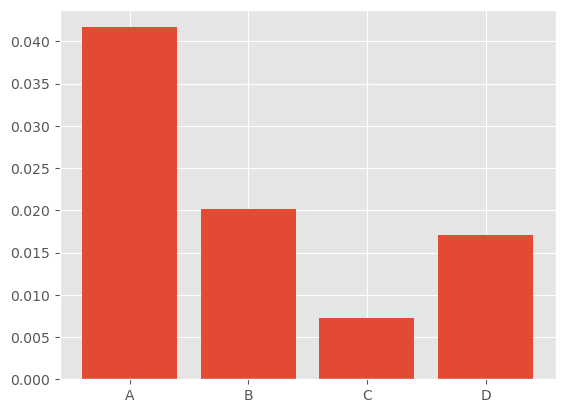

In [154]:
# Create visualization 1 here
# Import any additional libraries needed with alias

import matplotlib.pyplot as plt
import numpy as np
# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your Code Here:

names = list(abandonment_rates.keys())
values = list(abandonment_rates.values())

plt.bar(range(len(abandonment_rates)), values, tick_label=names)

plt.title="Average AB rate"
plt.xlabel="Queue Names"
plt.ylabel="Aband rate"


plt.show()


#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: I would choose a grouped bar chart. This type of chart allows us to compare multiple variable (in this case, service level percentage and average speed of answer) across multiple categories (in this case, rep), making it a suitable choice for this task .

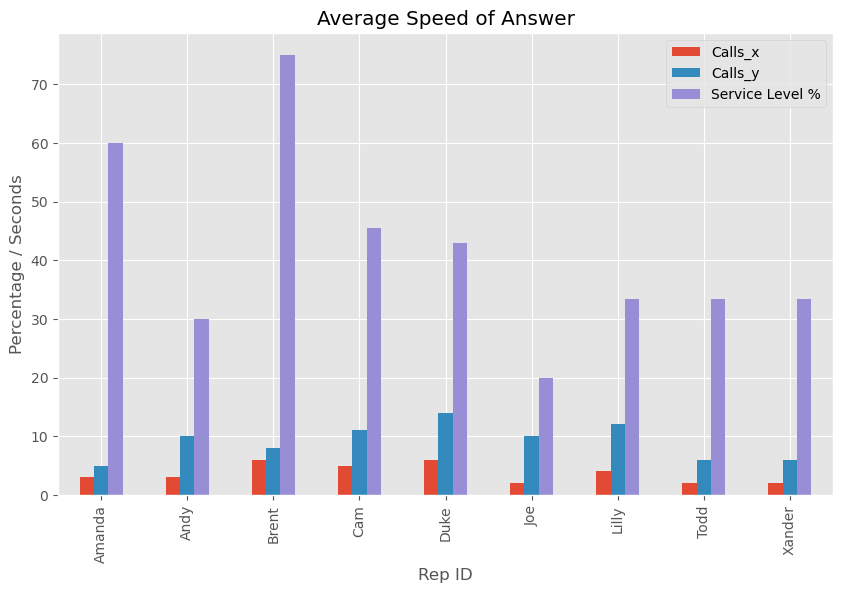

In [155]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep
north=north_df
north_plt = north.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north[north["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north[north["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:
service_level.plot(kind='bar', title='Average Speed of Answer', ylabel='Percentage / Seconds',
         xlabel='Rep ID', figsize=(10, 6))

plt.show()


#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: Used pie chart to display the call purpose. 

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64


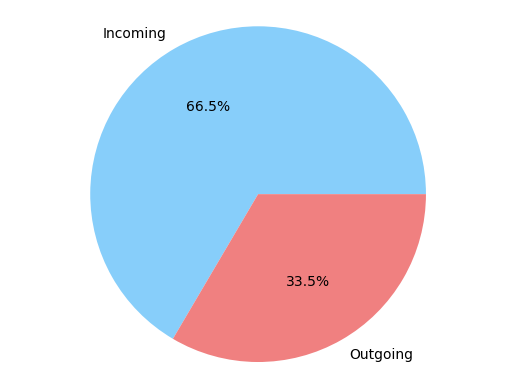

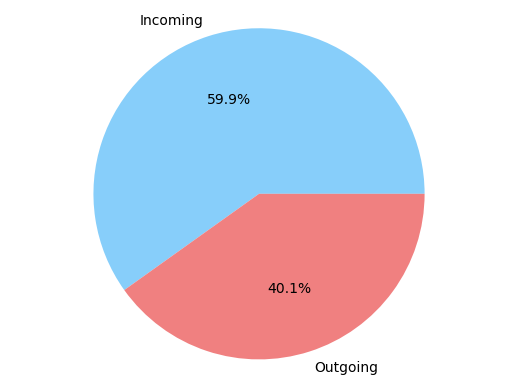

In [156]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:
#North branch
north_branch_calls = df[df["Branch"] == "North"]
north_call_purpose = north_branch_calls["Incoming or Outgoing"].value_counts()
call_labels = ["Incoming", "Outgoing"]
call_colors = ["lightskyblue", "lightcoral"]
plt.pie(north_call_purpose, labels=call_labels, colors=call_colors,autopct="%1.1f%%")

plt.title='North Branch'
plt.axis("equal")
plt.show()

# South Branch
south_branch_calls = df[df["Branch"] == "South"]
south_call_purpose = south_branch_calls["Incoming or Outgoing"].value_counts()

plt.pie(south_call_purpose, labels=call_labels, colors=call_colors, autopct="%1.1f%%")
plt.title="South Branch"
plt.axis("equal")
plt.show()

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: 
Based on the KPIs provided, it is difficult to definitively say which branch is operating more efficiently. Both branches have similar average abandonment rates and service levels, with the North branch having a slightly higher average speed of answer. 


#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: South Branch


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: Ratings for Reps would be useful to see which branch reps has highest ratings


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [157]:
# # Create your Bonus Mission visualization here!

